In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [314]:
#!ls

In [315]:
#raw_df = pd.read_csv("shampoo-sales.csv")

#raw_df.head(5)

In [316]:
#raw_df = raw_df.sort_values(
   # by="Month",
    #ascending=True
#)

#raw_df

In [317]:
#raw_df.columns = [
   # "_".join(each.lower().split())for each in raw_df.columns
#]
#raw_df

Some good models include:
- **EWMA (Holt-Winters) from statsmodels**
- ARIMA (and SARIMA, optional) from statsmodels as well
- Use feature engineering to create a tree-based forecaster (Gradient Boosting Regressor from sklearn). the features you would use are lags.
- You can use the facebook prophet package to achieve the same

### homework
1. If you can make ARIMA or prophet work, would be great for a fruitful session #2
2. Try using flask to deploy on your machine

### Exponential Smoothing

In [2]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
#train_df = raw_df[:-1].copy()

#train_df

#### To generate forecasts for JANUARY 2021, make sure your dataset has data up until 31/12/2020

IN your task:
Forecast
    - filter out data from raw_df
    - Category 'Alkohounfaelle'
    - Type 'ingesamt'
    - Year '2021'
    - Month '01
    
#### Then Filter
- Category 'Alkohounfaelle'
- Type 'ingesamt'

-> train_df

In [320]:
# pass "predictor" series of train_df to function
#model = ExponentialSmoothing(train_df.sales_of_shampoo_over_a_three_year_period).fit()

#### To generate forecasts simply ask pass how many steps to the model
1 month = 31 days = 31 steps

In [321]:
#model.forecast(steps=3)

## Actual Data

In [322]:
#!ls

In [323]:
eda_df = pd.read_csv(
    "210619monatszahlenjuni2021monatszahlen2106verkehrsunfaelle.csv"
)

eda_df.columns = [each.lower() for each in eda_df.columns]

In [324]:
# we filter for the category and type as requested by task
# we exclude 2021 data, since we are going to forecast for month 01/2021
# in the data there also exist yearly sums, we will exclude these

train_df = eda_df[
    (eda_df.monatszahl == "Alkoholunfälle") &
    (eda_df.auspraegung == "insgesamt") &
    (eda_df.jahr != 2021) &
    (eda_df.monat != "Summe")
].copy().sort_values(
    by="monat"
).reset_index(drop=True)

train_df

,monatszahl,auspraegung,jahr,monat,wert,vorjahreswert,veraend_vormonat_prozent,veraend_vorjahresmonat_prozent,zwoelf_monate_mittelwert
0,Alkoholunfälle,insgesamt,2000,200001,78.0,NaN,NaN,NaN,78.0
1,Alkoholunfälle,insgesamt,2000,200002,53.0,NaN,-32.05,NaN,66.0
2,Alkoholunfälle,insgesamt,2000,200003,73.0,NaN,37.74,NaN,68.0
3,Alkoholunfälle,insgesamt,2000,200004,78.0,NaN,6.85,NaN,71.0
4,Alkoholunfälle,insgesamt,2000,200005,96.0,NaN,23.08,NaN,76.0
...,...,...,...,...,...,...,...,...,...
247,Alkoholunfälle,insgesamt,2020,202008,46.0,31.0,-20.69,48.39,39.0
248,Alkoholunfälle,insgesamt,2020,202009,46.0,47.0,0.00,-2.13,39.0
249,Alkoholunfälle,insgesamt,2020,202010,34.0,45.0,-26.09,-24.44,38.0
250,Alkoholunfälle,insgesamt,2020,202011,23.0,29.0,-32.35,-20.69,38.0


### visualizing

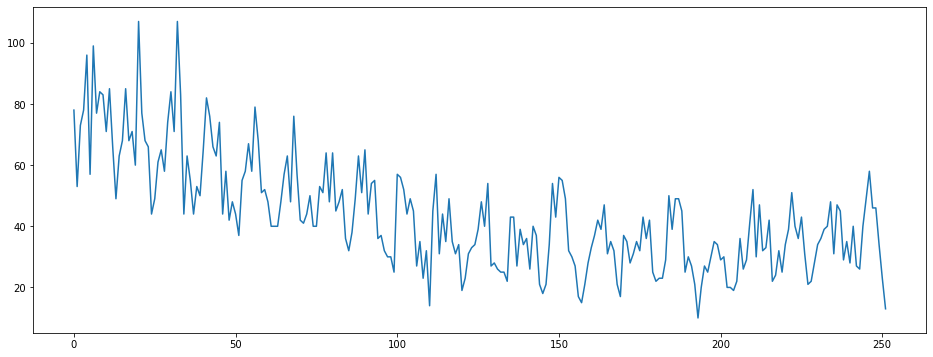

In [325]:
fig, ax = plt.subplots(1, 1, figsize=(16,6))
plt.plot(train_df.wert)
plt.show()

In [326]:
# the predictor field might be "wert"

model = ExponentialSmoothing(
    train_df.wert,
    seasonal_periods=12,
    trend="add",
    seasonal="mul"
).fit()

# model.summary()

In [327]:
my_result = model.forecast(steps=12).values
my_result

array([24.98876636, 25.56255207, 29.60561374, 32.21079599, 40.06717688,
       40.01902985, 48.37663855, 39.07721547, 46.00321687, 37.30134906,
       31.5459363 , 32.58244276])

**Input**

```json
{
    "year": 2021,
    "month": 10
}
```

```python
ind = input_json["month"] # == 10
return my_result[ind-1]
```

In [328]:
my_result[9]

37.30134905571655

### deployment
[How to Deploy Machine Learning Models using Flask (with Code!)](https://www.analyticsvidhya.com/blog/2020/04/how-to-deploy-machine-learning-model-flask/)

#### Note:
- You have been asked specifically to support the POST method
```python
@app.route('/', methods=['POST'])
```

### My version of pmdarima 
```bash
Name: pmdarima
Version: 1.8.0
Summary: Python's forecast::auto.arima equivalent
Home-page: http://alkaline-ml.com/pmdarima
Author: 
Author-email: 
License: MIT
Location: /Users/valiant/forge/.env/lib/python3.8/site-packages
Requires: Cython, joblib, numpy, pandas, scikit-learn, scipy, setuptools, statsmodels, urllib3
```

In [329]:
!pip install pmdarima==1.8.0

In [330]:
from statsmodels.tsa.arima_model import ARIMA

In [4]:
!ls

README.md         explorer_1.ipynb  shampoo-sales.csv
explorer.ipynb    fb_prophet.ipynb  some_data.csv


In [5]:
eda_df2 = pd.read_csv(
    "some_data.csv"
)

eda_df2.columns = [each.lower() for each in eda_df2.columns]

In [6]:
eda_df2

,monatszahl,auspraegung,jahr,monat,wert,vorjahreswert,veraend_vormonat_prozent,veraend_vorjahresmonat_prozent,zwoelf_monate_mittelwert
0,Alkoholunfälle,insgesamt,2021,202101,NaN,28.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2021,202102,NaN,40.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2021,202103,NaN,27.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2021,202104,NaN,26.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2021,202105,NaN,40.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1990,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0,NaN,-13.04,NaN,584.0
1991,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0,NaN,4.33,NaN,594.0
1992,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0,NaN,-8.89,NaN,596.0
1993,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0,NaN,-6.02,NaN,594.0


In [8]:
# we filter for the category and type as requested by task
# we exclude 2021 data, since we are going to forecast for month 01/2021
# in the data there also exist yearly sums, we will exclude these

train_df2 = eda_df2[
    (eda_df2.monatszahl == "Alkoholunfälle") &
    (eda_df2.auspraegung == "insgesamt") &
    (eda_df2.jahr != 2021) &
    (eda_df2.monat != "Summe")
].copy().sort_values(
    by="monat"
).reset_index(drop=True)

train_df2

,monatszahl,auspraegung,jahr,monat,wert,vorjahreswert,veraend_vormonat_prozent,veraend_vorjahresmonat_prozent,zwoelf_monate_mittelwert
0,Alkoholunfälle,insgesamt,2000,200001,78.0,NaN,NaN,NaN,78.0
1,Alkoholunfälle,insgesamt,2000,200002,53.0,NaN,-32.05,NaN,66.0
2,Alkoholunfälle,insgesamt,2000,200003,73.0,NaN,37.74,NaN,68.0
3,Alkoholunfälle,insgesamt,2000,200004,78.0,NaN,6.85,NaN,71.0
4,Alkoholunfälle,insgesamt,2000,200005,96.0,NaN,23.08,NaN,76.0
...,...,...,...,...,...,...,...,...,...
247,Alkoholunfälle,insgesamt,2020,202008,46.0,31.0,-20.69,48.39,39.0
248,Alkoholunfälle,insgesamt,2020,202009,46.0,47.0,0.00,-2.13,39.0
249,Alkoholunfälle,insgesamt,2020,202010,34.0,45.0,-26.09,-24.44,38.0
250,Alkoholunfälle,insgesamt,2020,202011,23.0,29.0,-32.35,-20.69,38.0


In [21]:
import statsmodels.api as sm

# visualizing

In [9]:
# Convert Month into Datetime
#train_df2['monat']=pd.to_datetime(train_df2['monat'])

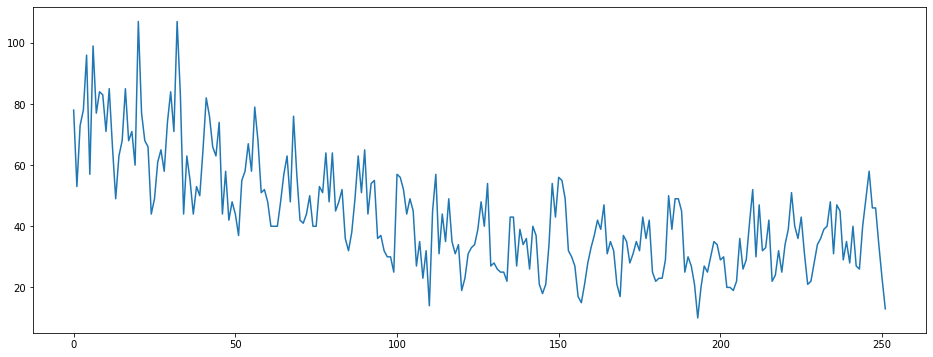

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(16,6))
plt.plot(train_df2.wert)
plt.show()

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

In [13]:
ad_test(train_df2.wert)
    #adf_test(df['AvgTemp'])

1. ADF :  -2.7784740406264814
2. P-Value :  0.06141499421706947
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression: 238
5. Critical Values :
	 1% :  -3.458128284586202
	 5% :  -2.873761835239286
	 10% :  -2.5732834559706235


In [14]:
train_df2['Seasonal First Difference']=train_df2['wert']-train_df2['wert'].shift(12)

In [15]:
train_df2.head(14)

,monatszahl,auspraegung,jahr,monat,wert,vorjahreswert,veraend_vormonat_prozent,veraend_vorjahresmonat_prozent,zwoelf_monate_mittelwert,Seasonal First Difference
0,Alkoholunfälle,insgesamt,2000,200001,78.0,NaN,NaN,NaN,78.0,NaN
1,Alkoholunfälle,insgesamt,2000,200002,53.0,NaN,-32.05,NaN,66.0,NaN
2,Alkoholunfälle,insgesamt,2000,200003,73.0,NaN,37.74,NaN,68.0,NaN
3,Alkoholunfälle,insgesamt,2000,200004,78.0,NaN,6.85,NaN,71.0,NaN
4,Alkoholunfälle,insgesamt,2000,200005,96.0,NaN,23.08,NaN,76.0,NaN
5,Alkoholunfälle,insgesamt,2000,200006,57.0,NaN,-40.63,NaN,73.0,NaN
6,Alkoholunfälle,insgesamt,2000,200007,99.0,NaN,73.68,NaN,76.0,NaN
7,Alkoholunfälle,insgesamt,2000,200008,77.0,NaN,-22.22,NaN,76.0,NaN
8,Alkoholunfälle,insgesamt,2000,200009,84.0,NaN,9.09,NaN,77.0,NaN
9,Alkoholunfälle,insgesamt,2000,200010,83.0,NaN,-1.19,NaN,78.0,NaN


In [16]:
## Again test dickey fuller test
ad_test(train_df2['Seasonal First Difference'].dropna())

## Again test dickey fuller test
#adfuller_test(df['Seasonal First Difference'].dropna())

#ad_test(train_df2.wert)
    #ad_test(df['AvgTemp'])

1. ADF :  -3.358728737351926
2. P-Value :  0.012448890266151648
3. Num Of Lags :  15
4. Num Of Observations Used For ADF Regression: 224
5. Critical Values :
	 1% :  -3.459884913337196
	 5% :  -2.8745310704320794
	 10% :  -2.573693840082908


<AxesSubplot:>

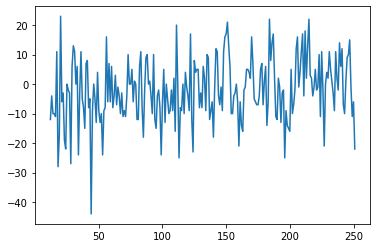

In [17]:
train_df2['Seasonal First Difference'].plot()

In [18]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

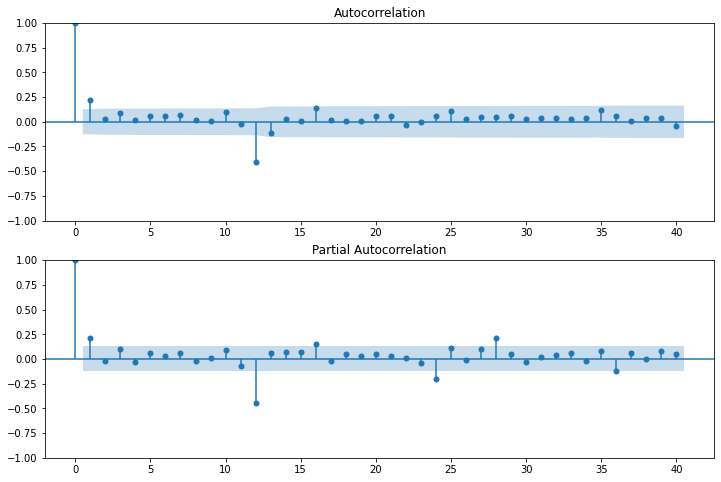

In [22]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_df2['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_df2['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [25]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [26]:
model=ARIMA(train_df2['wert'],order=(1,1,1))
model_fit=model.fit()

In [27]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   wert   No. Observations:                  252
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -962.013
Date:                Wed, 19 Jan 2022   AIC                           1930.027
Time:                        19:18:21   BIC                           1940.603
Sample:                             0   HQIC                          1934.283
                                - 252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4003      0.073      5.464      0.000       0.257       0.544
ma.L1         -0.9261      0.031    -30.005      0.000      -0.987      -0.866
sigma2       124.3188     10.243     12.137      0.000     104.243     144.394
===================================================================================
Ljung-Box (L1) (Q):                   0.97   Jarque-Bera (JB):                12.68
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                             0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

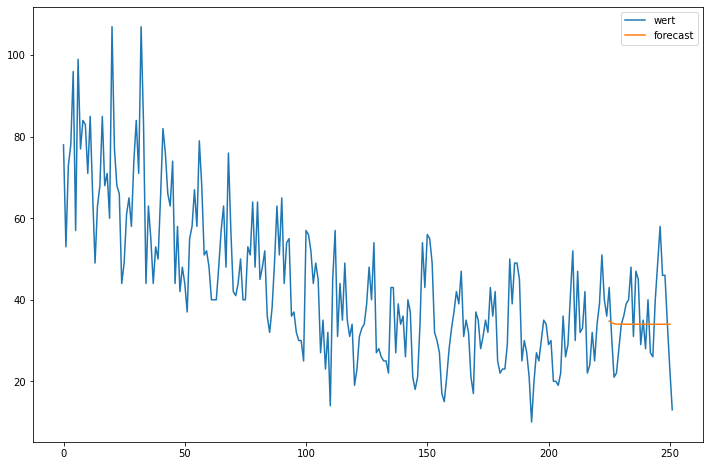

In [29]:
train_df2['forecast']=model_fit.predict(start=225,end=250,dynamic=True)
train_df2[['wert','forecast']].plot(figsize=(12,8))

In [30]:
import statsmodels.api as sm

In [31]:
model=sm.tsa.statespace.SARIMAX(train_df2['wert'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit(disp=0)

<AxesSubplot:>

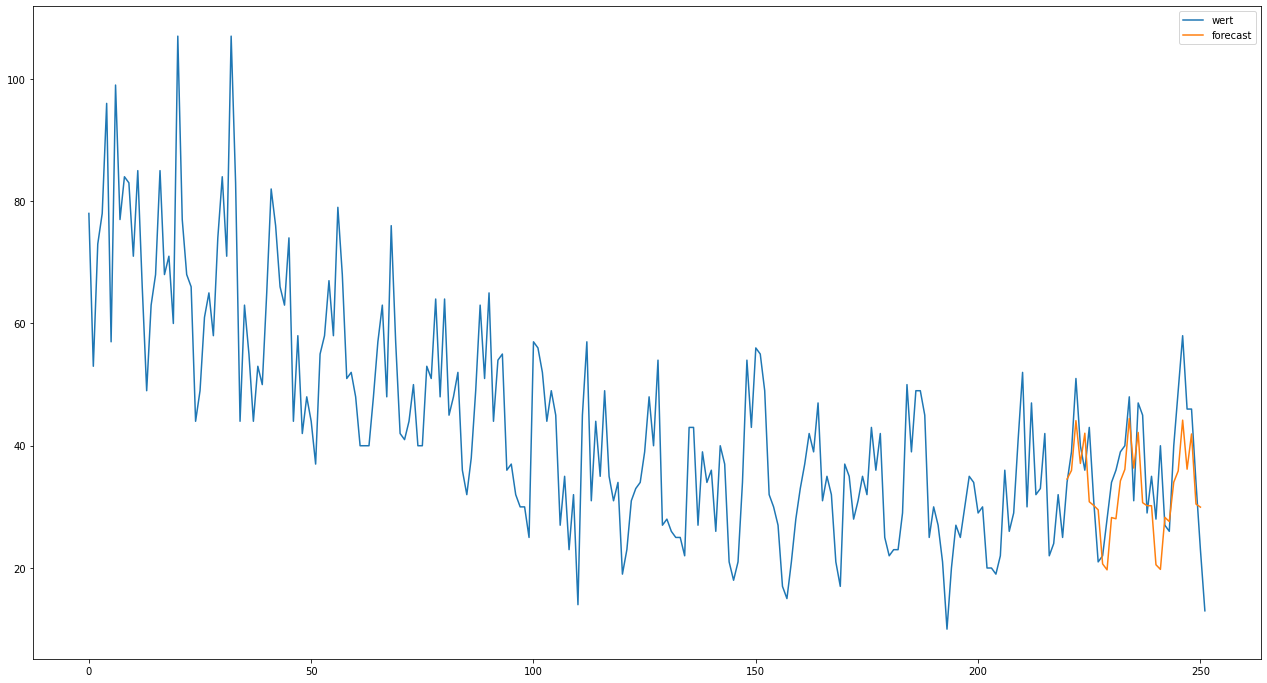

In [32]:
train_df2['forecast']=results.predict(start=220,end=250,dynamic=True)
train_df2[['wert','forecast']].plot(figsize=(22,12))

In [33]:
train_df2.tail()

,monatszahl,auspraegung,jahr,monat,wert,vorjahreswert,veraend_vormonat_prozent,veraend_vorjahresmonat_prozent,zwoelf_monate_mittelwert,Seasonal First Difference,forecast
247,Alkoholunfälle,insgesamt,2020,202008,46.0,31.0,-20.69,48.39,39.0,15.0,36.166553
248,Alkoholunfälle,insgesamt,2020,202009,46.0,47.0,0.00,-2.13,39.0,-1.0,41.926703
249,Alkoholunfälle,insgesamt,2020,202010,34.0,45.0,-26.09,-24.44,38.0,-11.0,30.458438
250,Alkoholunfälle,insgesamt,2020,202011,23.0,29.0,-32.35,-20.69,38.0,-6.0,29.957373
251,Alkoholunfälle,insgesamt,2020,202012,13.0,35.0,-43.48,-62.86,36.0,-22.0,NaN


In [34]:
train_df2['monat'] = pd.to_datetime(train_df2['monat'].astype(str), format='%Y%m', errors='coerce').dropna()

In [35]:
train_df2.tail()

,monatszahl,auspraegung,jahr,monat,wert,vorjahreswert,veraend_vormonat_prozent,veraend_vorjahresmonat_prozent,zwoelf_monate_mittelwert,Seasonal First Difference,forecast
247,Alkoholunfälle,insgesamt,2020,2020-08-01,46.0,31.0,-20.69,48.39,39.0,15.0,36.166553
248,Alkoholunfälle,insgesamt,2020,2020-09-01,46.0,47.0,0.00,-2.13,39.0,-1.0,41.926703
249,Alkoholunfälle,insgesamt,2020,2020-10-01,34.0,45.0,-26.09,-24.44,38.0,-11.0,30.458438
250,Alkoholunfälle,insgesamt,2020,2020-11-01,23.0,29.0,-32.35,-20.69,38.0,-6.0,29.957373
251,Alkoholunfälle,insgesamt,2020,2020-12-01,13.0,35.0,-43.48,-62.86,36.0,-22.0,NaN


# Split Data into Training and Testing

In [36]:
print(train_df2.shape)
train=train_df2.iloc[:-30]
test=train_df2.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(252, 11)
(222, 11) (30, 11)
monatszahl                             Alkoholunfälle
auspraegung                                 insgesamt
jahr                                             2018
monat                             2018-07-01 00:00:00
wert                                             51.0
vorjahreswert                                    52.0
veraend_vormonat_prozent                        30.77
veraend_vorjahresmonat_prozent                  -1.92
zwoelf_monate_mittelwert                         34.0
Seasonal First Difference                        -1.0
forecast                                    44.106767
Name: 222, dtype: object monatszahl                             Alkoholunfälle
auspraegung                                 insgesamt
jahr                                             2020
monat                             2020-12-01 00:00:00
wert                                             13.0
vorjahreswert                                    35.0
veraend_vormonat_prozent    

# Train the Model

In [39]:
# modell=ARIMA(train['wert'],order=(1,1,1))
modell=model.fit()
modell.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.49177D+00    |proj g|=  1.00200D-01

At iterate    5    f=  3.40558D+00    |proj g|=  1.38624D-02

At iterate   10    f=  3.38835D+00    |proj g|=  2.83595D-03

At iterate   15    f=  3.38814D+00    |proj g|=  1.01522D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     20      1     0     0   1.124D-06   3.388D+00
  F =   3.3881425907463063     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               wert   No. Observations:                  252
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -853.812
Date:                            Wed, 19 Jan 2022   AIC                           1717.624
Time:                                    19:19:57   BIC                           1735.006
Sample:                                         0   HQIC                          1724.628
                                            - 252                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1090      0.076      1.443      0.149      -0.039       0.257
ma.L1         -0.9164      0.037    -24.976      0.000      -0.988      -0.844
ar.S.L12      -0.0725      0.092     -0.784      0.433      -0.254       0.109
ma.S.L12      -0.7049      0.086     -8.187      0.000      -0.874      -0.536
sigma2        70.6576      5.740     12.310      0.000      59.408      81.908
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 6.29
Prob(Q):                              0.93   Prob(JB):                         0.04
Heteroskedasticity (H):               0.58   Skew:                             0.10
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model.forecast(steps=12).values

# Make Predictions on Test Set

<AxesSubplot:>

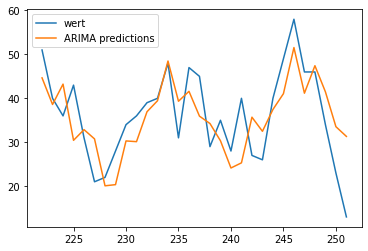

In [47]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2020-12-01',end='2021-01-30')
pred=modell.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates

my_result = modell.predict(
    start=start,
    end=end,
    typ='levels').rename(
    'ARIMA predictions'
)

# pred.plot(legend=True)
test['wert'].plot(legend=True)
my_result.plot(legend=True)

In [53]:
start

222

In [52]:
train_df2

,monatszahl,auspraegung,jahr,monat,wert,vorjahreswert,veraend_vormonat_prozent,veraend_vorjahresmonat_prozent,zwoelf_monate_mittelwert,Seasonal First Difference,forecast
0,Alkoholunfälle,insgesamt,2000,2000-01-01,78.0,NaN,NaN,NaN,78.0,NaN,NaN
1,Alkoholunfälle,insgesamt,2000,2000-02-01,53.0,NaN,-32.05,NaN,66.0,NaN,NaN
2,Alkoholunfälle,insgesamt,2000,2000-03-01,73.0,NaN,37.74,NaN,68.0,NaN,NaN
3,Alkoholunfälle,insgesamt,2000,2000-04-01,78.0,NaN,6.85,NaN,71.0,NaN,NaN
4,Alkoholunfälle,insgesamt,2000,2000-05-01,96.0,NaN,23.08,NaN,76.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
247,Alkoholunfälle,insgesamt,2020,2020-08-01,46.0,31.0,-20.69,48.39,39.0,15.0,36.166553
248,Alkoholunfälle,insgesamt,2020,2020-09-01,46.0,47.0,0.00,-2.13,39.0,-1.0,41.926703
249,Alkoholunfälle,insgesamt,2020,2020-10-01,34.0,45.0,-26.09,-24.44,38.0,-11.0,30.458438
250,Alkoholunfälle,insgesamt,2020,2020-11-01,23.0,29.0,-32.35,-20.69,38.0,-6.0,29.957373


<AxesSubplot:>

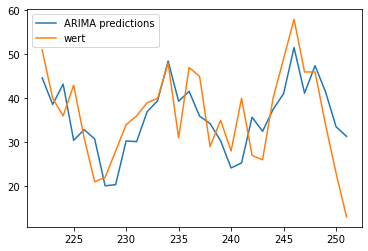

In [357]:
pred.plot(legend='ARIMA Predictions')
test['wert'].plot(legend=True)

In [358]:
train_df2.tail()

,monatszahl,auspraegung,jahr,monat,wert,vorjahreswert,veraend_vormonat_prozent,veraend_vorjahresmonat_prozent,zwoelf_monate_mittelwert,Seasonal First Difference,forecast
247,Alkoholunfälle,insgesamt,2020,2020-08-01,46.0,31.0,-20.69,48.39,39.0,15.0,36.166551
248,Alkoholunfälle,insgesamt,2020,2020-09-01,46.0,47.0,0.00,-2.13,39.0,-1.0,41.926701
249,Alkoholunfälle,insgesamt,2020,2020-10-01,34.0,45.0,-26.09,-24.44,38.0,-11.0,30.458436
250,Alkoholunfälle,insgesamt,2020,2020-11-01,23.0,29.0,-32.35,-20.69,38.0,-6.0,29.957371
251,Alkoholunfälle,insgesamt,2020,2020-12-01,13.0,35.0,-43.48,-62.86,36.0,-22.0,NaN


# For Future Dates

In [363]:
# the predictor field might be "wert"
#modell=ARIMA(train['wert'],order=(1,1,1))
#modell=model.fit()
#modell.summary()

model2=ARIMA(train_df2['wert'],order=(1,1,1))
model2=model2.fit()
train_df2.tail()

,monatszahl,auspraegung,jahr,monat,wert,vorjahreswert,veraend_vormonat_prozent,veraend_vorjahresmonat_prozent,zwoelf_monate_mittelwert,Seasonal First Difference,forecast
247,Alkoholunfälle,insgesamt,2020,2020-08-01,46.0,31.0,-20.69,48.39,39.0,15.0,36.166551
248,Alkoholunfälle,insgesamt,2020,2020-09-01,46.0,47.0,0.00,-2.13,39.0,-1.0,41.926701
249,Alkoholunfälle,insgesamt,2020,2020-10-01,34.0,45.0,-26.09,-24.44,38.0,-11.0,30.458436
250,Alkoholunfälle,insgesamt,2020,2020-11-01,23.0,29.0,-32.35,-20.69,38.0,-6.0,29.957371
251,Alkoholunfälle,insgesamt,2020,2020-12-01,13.0,35.0,-43.48,-62.86,36.0,-22.0,NaN


In [364]:
index_future_dates=pd.date_range(start='2020-12-01',end='2021-01-03')
#print(index_future_dates)
pred=modell.predict(start=len(train_df2),end=len(train_df2)+33,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2020-12-01    22.048067
2020-12-02    27.438504
2020-12-03    30.766734
2020-12-04    30.568513
2020-12-05    37.855028
2020-12-06    41.668237
2020-12-07    50.681486
2020-12-08    39.083181
2020-12-09    44.452927
2020-12-10    37.986738
2020-12-11    29.749977
2020-12-12    27.360432
2020-12-13    24.109832
2020-12-14    28.765299
2020-12-15    30.777483
2020-12-16    30.506705
2020-12-17    38.278322
2020-12-18    42.467361
2020-12-19    51.479631
2020-12-20    39.852204
2020-12-21    44.832685
2020-12-22    37.965339
2020-12-23    29.528264
2020-12-24    26.587021
2020-12-25    24.227978
2020-12-26    28.936725
2020-12-27    31.044312
2020-12-28    30.778794
2020-12-29    38.515245
2020-12-30    42.677038
2020-12-31    51.689379
2021-01-01    40.064064
2021-01-02    45.072763
2021-01-03    38.234498
Freq: D, Name: ARIMA Predictions, dtype: float64


### Final

In [72]:
start=len(train_df2)
end=len(train_df2)+12-1

my_result2 = modell.predict(
    start=start,
    end=end,
    typ='levels').rename(
    'ARIMA predictions'
)

In [73]:
my_result2.values[6-1]

41.668236223561564

In [62]:
end

253

In [366]:
#my_result2 = model2.forecast(12)
#my_result2

In [74]:
!pip install flask